AI statement:
Generative AI (ChatGPT) was used to clarify concepts and error correct

DBSCAN (Density-Based Spatial Clustering of Applications with Noise)



Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

Defining Key Functions and Parameters



In [4]:
#function for plotting clusters

def plot_cluster(X, labels, title):
    plt.figure(figsize=(6,8))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar(label="Cluster Label")
    plt.show()
    
#Grid search will be applied to find the best parameters each clustering algorithm
#silhouette score will be used as the evaluation metric

# Define parameter grids
param_grid_kmeans = {'n_clusters': [2, 3, 4, 5]}
param_grid_agg = {'n_clusters': [2, 3, 4, 5], 'linkage': ['ward', 'complete', 'average']}
param_grid_dbscan = {'eps': [0.1, 0.2, 0.3], 'min_samples': [5, 10, 15]}

def custom_silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

    

Apply Clustering Algorithmns to make_moons data. This highlights DBSCAN's ability to handle irregalurly shaped clusters

c:\Users\ruths\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ruths\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ruths\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ruths\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

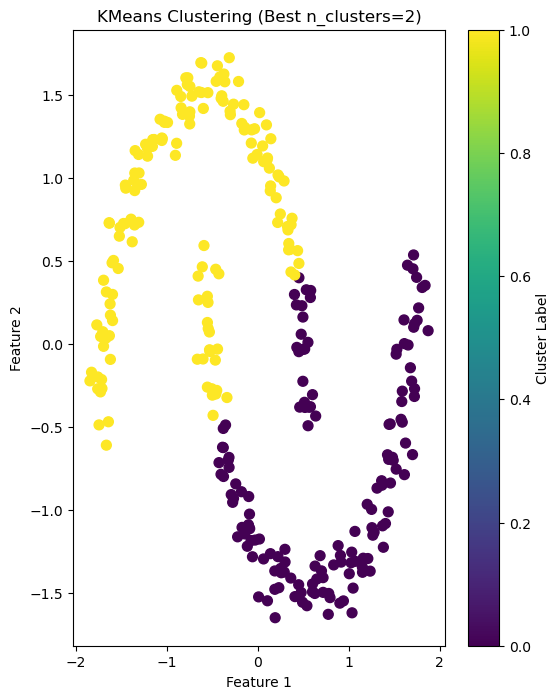

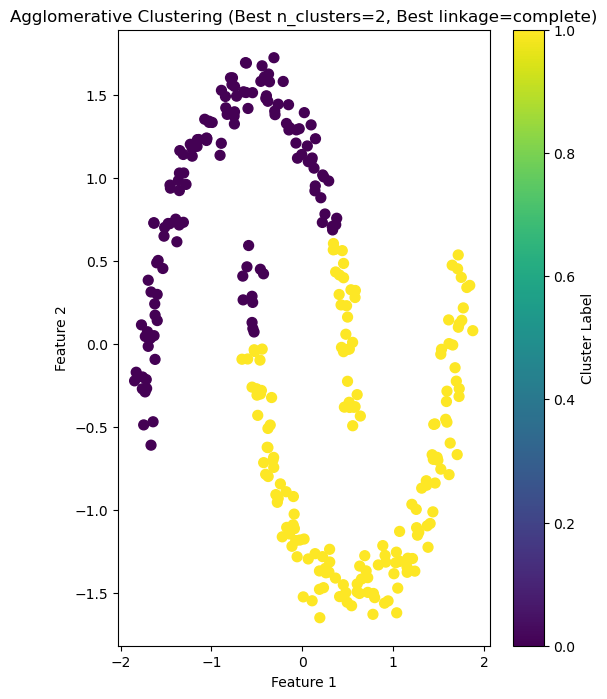

c:\Users\ruths\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ruths\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ruths\AppData\Local\Temp\ipykernel_16228\1848714196.py", line 22, in custom_silhouette_scorer
    return silhouette_score(X, labels)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ruths\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ruths\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_unsupervised.py", line 131, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
        

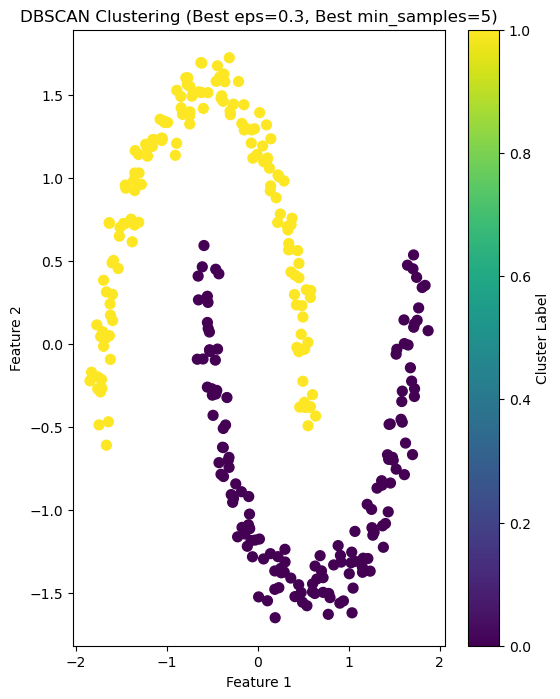

In [5]:
X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
X_moons = StandardScaler().fit_transform(X_moons)  # Normalize data


# Perform grid search for KMeans
grid_search_kmeans = GridSearchCV(KMeans(random_state=42), param_grid_kmeans, cv=5, scoring=custom_silhouette_scorer)
grid_search_kmeans.fit(X_moons)
#plot the best KMeans clustering result
best_kmeans = grid_search_kmeans.best_estimator_ 
plot_cluster(X_moons, best_kmeans.labels_, f'KMeans Clustering (Best n_clusters={grid_search_kmeans.best_params_["n_clusters"]})')
  
#For Agglomerative Clustering
grid_search_agg = GridSearchCV(AgglomerativeClustering(), param_grid_agg, cv=5, scoring=custom_silhouette_scorer)
grid_search_agg.fit(X_moons)
best_heircluster = grid_search_agg.best_estimator_ 
plot_cluster(X_moons, best_heircluster.labels_, f'Agglomerative Clustering (Best n_clusters={grid_search_agg.best_params_["n_clusters"]}, Best linkage={grid_search_agg.best_params_["linkage"]})')

#for DBSCAN
grid_search_dbscan = GridSearchCV(DBSCAN(), param_grid_dbscan, cv=5, scoring=custom_silhouette_scorer)
grid_search_dbscan.fit(X_moons)
best_kmeans = grid_search_dbscan.best_estimator_ 
plot_cluster(X_moons, best_kmeans.labels_, f'DBSCAN Clustering (Best eps={grid_search_dbscan.best_params_["eps"]}, Best min_samples={grid_search_dbscan.best_params_["min_samples"]})') 

Apply For Make Blobs - Highlights DBSCAN's difficulty with high density data

c:\Users\ruths\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ruths\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ruths\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ruths\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

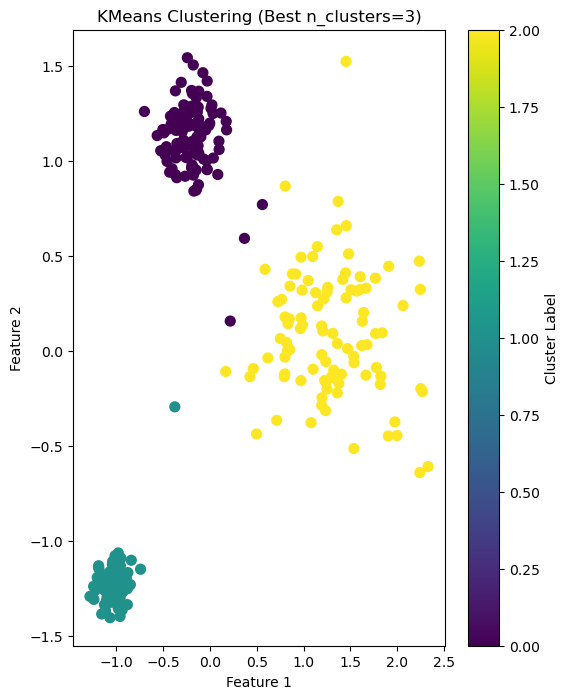

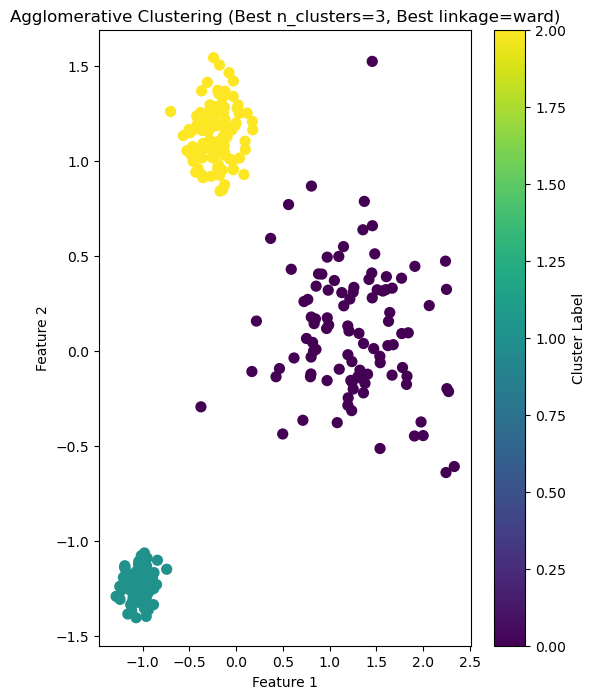

c:\Users\ruths\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ruths\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ruths\AppData\Local\Temp\ipykernel_16228\1848714196.py", line 22, in custom_silhouette_scorer
    return silhouette_score(X, labels)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ruths\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ruths\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_unsupervised.py", line 131, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
        

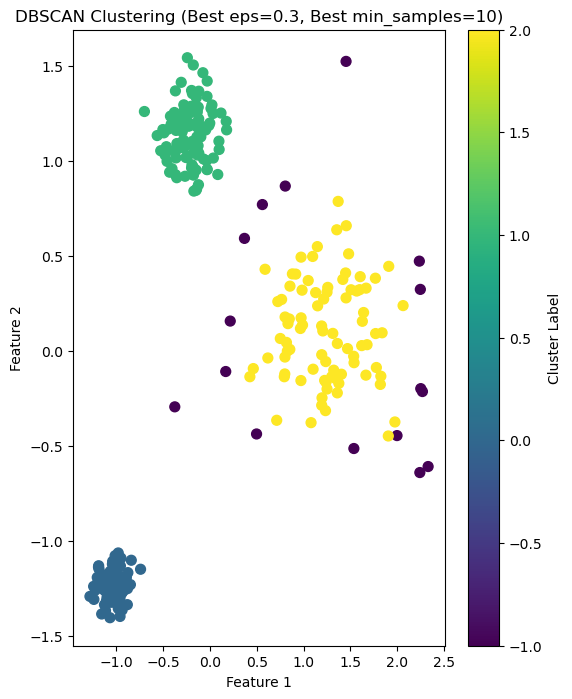

In [6]:
X_blobs, _ = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)
X_blobs = StandardScaler().fit_transform(X_blobs)


# Perform grid search for KMeans
grid_search_kmeans = GridSearchCV(KMeans(random_state=42), param_grid_kmeans, cv=5, scoring=custom_silhouette_scorer)
grid_search_kmeans.fit(X_blobs)
#plot the best KMeans clustering result
best_kmeans = grid_search_kmeans.best_estimator_ 
plot_cluster(X_blobs, best_kmeans.labels_, f'KMeans Clustering (Best n_clusters={grid_search_kmeans.best_params_["n_clusters"]})') 
#For Agglomerative Clustering
grid_search_agg = GridSearchCV(AgglomerativeClustering(), param_grid_agg, cv=5, scoring=custom_silhouette_scorer)
grid_search_agg.fit(X_blobs)
best_heircluster = grid_search_agg.best_estimator_ 
plot_cluster(X_blobs, best_heircluster.labels_, f'Agglomerative Clustering (Best n_clusters={grid_search_agg.best_params_["n_clusters"]}, Best linkage={grid_search_agg.best_params_["linkage"]})')

#for DBSCAN
grid_search_dbscan = GridSearchCV(DBSCAN(), param_grid_dbscan, cv=5, scoring=custom_silhouette_scorer)
grid_search_dbscan.fit(X_blobs)
best_kmeans = grid_search_dbscan.best_estimator_ 
plot_cluster(X_blobs, best_kmeans.labels_, f'DBSCAN Clustering (Best eps={grid_search_dbscan.best_params_["eps"]}, Best min_samples={grid_search_dbscan.best_params_["min_samples"]})') 